# Power Tranformer - Notes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer

In [29]:
df = pd.read_csv('Datasets/winequalityN.csv')

In [30]:
df.sample(4)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2179,white,7.7,0.240,0.31,1.3,0.047,33.0,106.0,0.99300,3.22,0.55,10.8,6
4470,white,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6
3732,white,7.5,0.280,0.41,1.3,0.044,11.0,126.0,0.99293,3.28,0.45,10.3,5
4490,white,5.8,0.300,0.33,3.5,0.033,25.0,116.0,0.99057,3.20,0.44,11.7,6


In [38]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
X = df.drop(columns=['type'])
y = df.iloc[:,0]

### Train Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Applying Regression without any transformation

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)

C:\Users\anike\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9829809179989686

In [42]:
X_train.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

### Ploting histplot and QQ plot before trasformation:

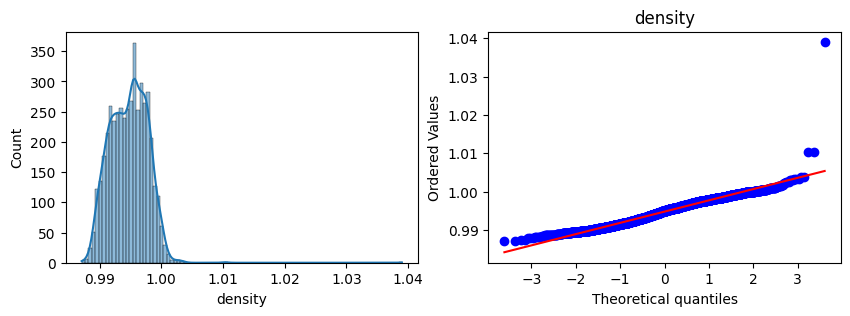

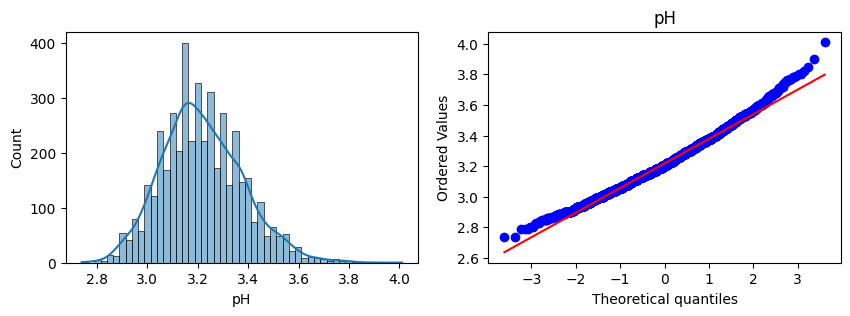

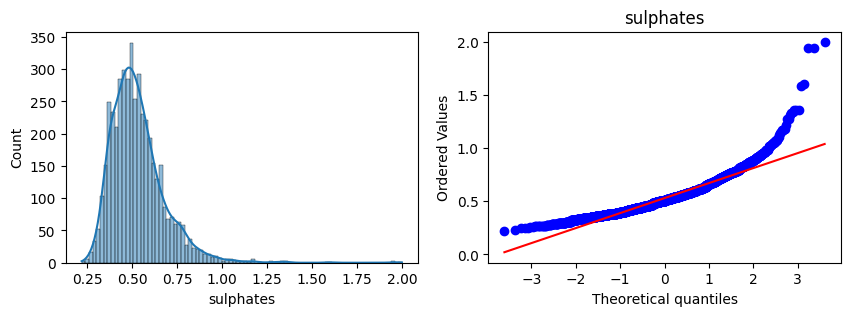

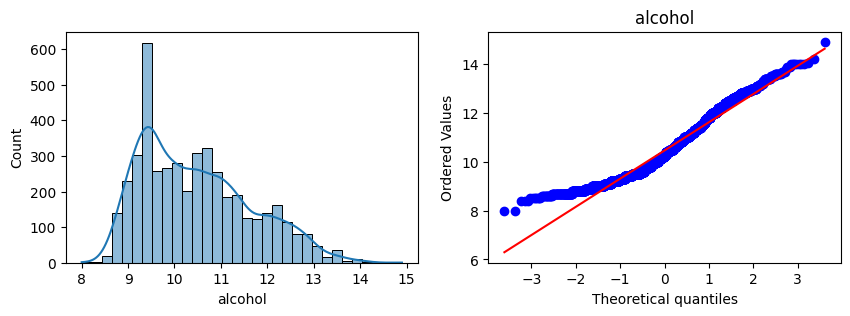

In [43]:
col = ['density', 'pH', 'sulphates', 'alcohol']

for i in col:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(data=X_train, x=i, ax=ax1, kde=True)
    plt.title(i)

    stats.probplot(X_train[i], dist="norm", plot=ax2)
    plt.title(i)

    plt.show()

## Box-Cox Transformation:

The `Box-Cox transformation` is a statistical technique that transforms data into a normal distribution. It's commonly used to improve the accuracy of predictions.

### How it works:
- The Box-Cox transformation applies a power to the original data.  
- The value of lambda can range from -5 to 5.  
- The transformation evaluates several values of lambda and selects the one that returns the best transformation.  
- The best transformation is the one that makes the transformed data look most like a normal distribution. 


<img src='images/box.png' width='440px'>

In [44]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,fixed acidity,-1.341494
1,volatile acidity,-0.275097
2,citric acid,0.692715
3,residual sugar,-0.178429
4,chlorides,-0.434556
5,free sulfur dioxide,0.454656
6,total sulfur dioxide,0.868782
7,density,-28.542611
8,pH,-1.619234
9,sulphates,-0.479380


In [45]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

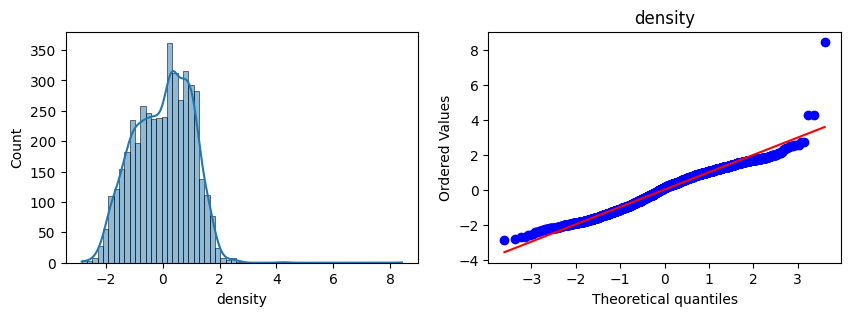

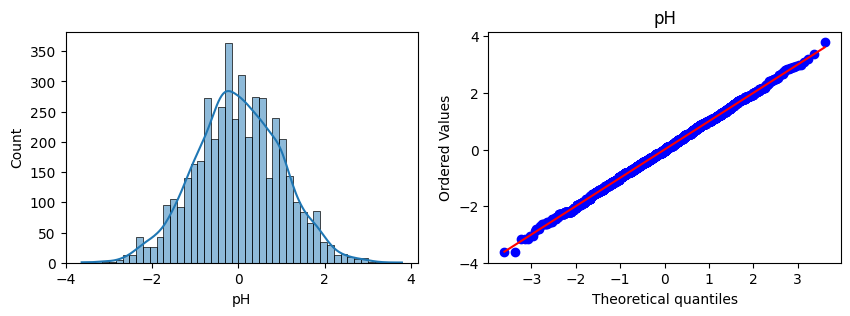

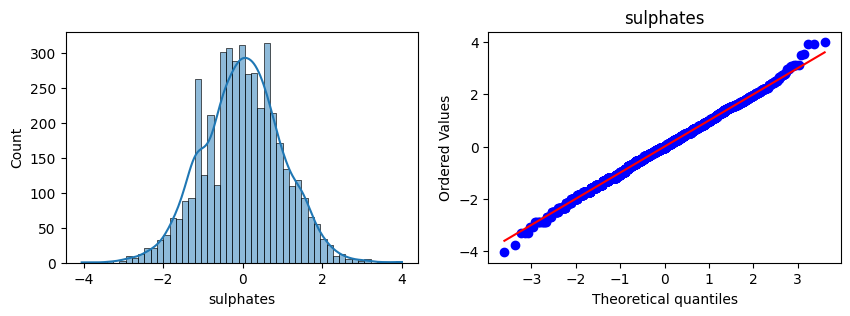

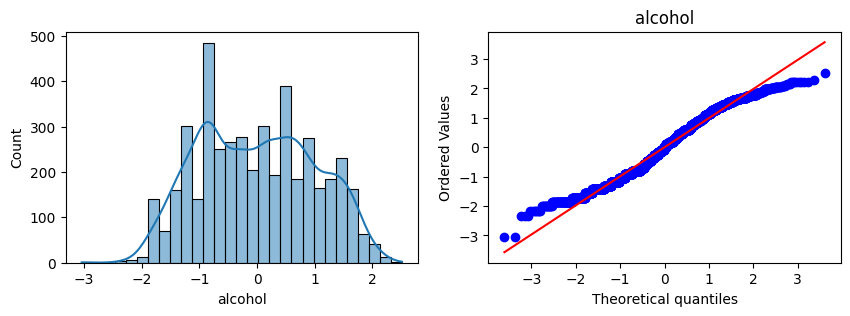

In [47]:
col = ['density', 'pH', 'sulphates', 'alcohol']

for i in col:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(data=X_train_transformed, x=i, ax=ax1, kde=True)
    plt.title(i)

    stats.probplot(X_train_transformed[i], dist="norm", plot=ax2)
    plt.title(i)

    plt.show()

### Applying logistic Regression after transformation:

In [48]:
lr1 = LogisticRegression()
lr1.fit(X_train_transformed, y_train)
y_pred = lr1.predict(X_test_transformed)
accuracy_score(y_pred, y_test)

C:\Users\anike\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9958741619391439

## Yeo-Johnson transform:

The `Yeo-Johnson transformation` is a data transformation that makes data more symmetric and closer to a normal distribution. It's similar to the Box-Cox transformation, but can handle data with negative values.  

### How it works:

- The Yeo-Johnson transformation inflates low variance data and deflates high variance data. 
- It can be used to make variable distributions more symmetric. 
- It can be used to stabilize variance. 

<img src='images/yoe.png' width='550px'>

In [53]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

In [54]:
lr2 = LogisticRegression()
lr2.fit(X_train_transformed2,y_train)

y_pred3 = lr2.predict(X_test_transformed2)

print(accuracy_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.9943269726663229


,cols,Yeo_Johnson_lambdas
0,fixed acidity,-1.671470
1,volatile acidity,-3.934612
2,citric acid,0.205213
3,residual sugar,-0.415498
4,chlorides,-22.834608
5,free sulfur dioxide,0.430543
6,total sulfur dioxide,0.871338
7,density,-49.801534
8,pH,-2.429594
9,sulphates,-3.149036


In [51]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

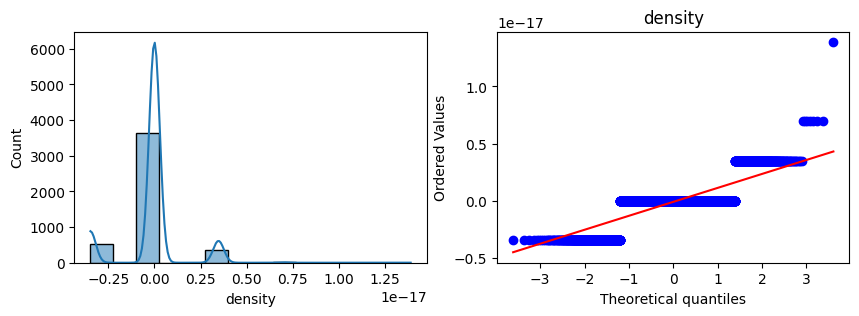

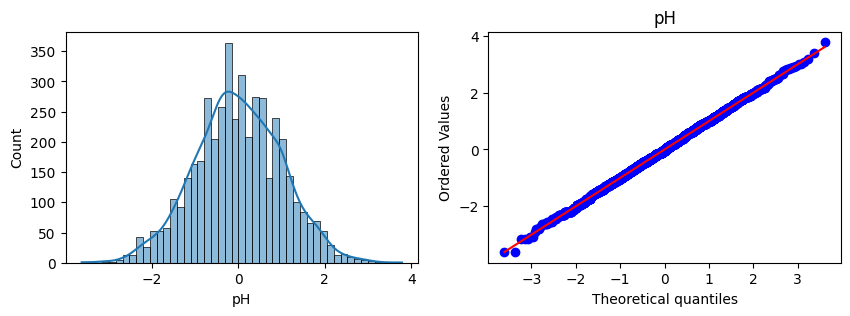

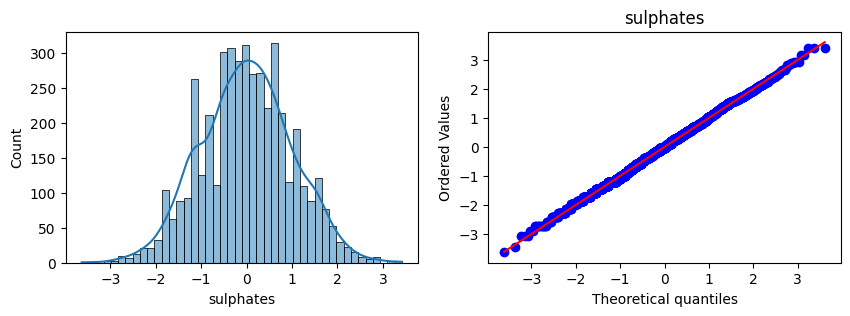

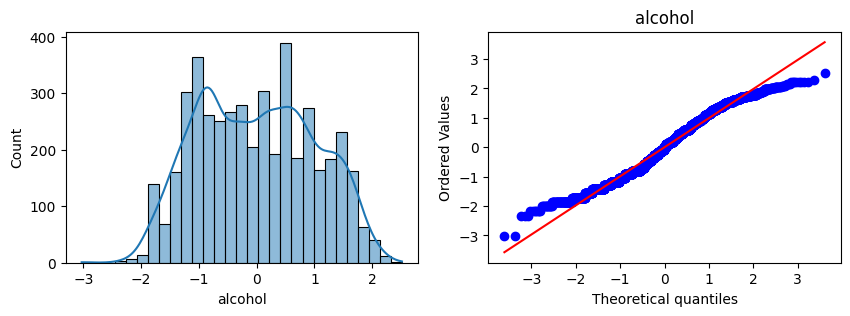

In [52]:
col = ['density', 'pH', 'sulphates', 'alcohol']

for i in col:
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(data=X_train_transformed2, x=i, ax=ax1, kde=True)
    plt.title(i)

    stats.probplot(X_train_transformed2[i], dist="norm", plot=ax2)
    plt.title(i)

    plt.show()